In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
# %matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
# import seawater as sw

-----calc
sys glob os
numpy
netcdf
ipdb
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
ipdb
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots
CPU times: user 1.97 s, sys: 1.85 s, total: 3.81 s
Wall time: 28 s


In [3]:
mfdset_kwargs = dict(combine='nested', concat_dim='time', 
                     data_vars='minimal', coords='minimal', compat='override', join='override',
                    )

In [4]:
fpathi = '/pool/data/ICDC/ocean/en4/DATA/analyses/EN.4.2.1.f.analysis.g10.201???.nc'
ds = xr.open_mfdataset(fpathi, **mfdset_kwargs)

In [5]:
ds

<xarray.Dataset>
Dimensions:                          (bnds: 2, depth: 42, lat: 173, lon: 360, time: 120)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2010-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (depth, bnds) float32 dask.array<chunksize=(42, 2), meta=np.ndarray>
Attributes: (12/21)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             None
    institution:            UK Met Office
    contact:                Simon Good - simon.good@metoffice.gov.uk
    ...                     ...
    stop_time:              00:00:00 UTC
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0

In [6]:
%%time
to = ds.temperature.groupby('time.month').mean().compute()
so = ds.salinity.groupby('time.month').mean().compute()

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 14 s, sys: 14 s, total: 28 s
Wall time: 19.1 s


In [16]:
to_10YM = to.mean(dim='month')
so_10YM = so.mean(dim='month')

<IPython.core.display.Javascript object>


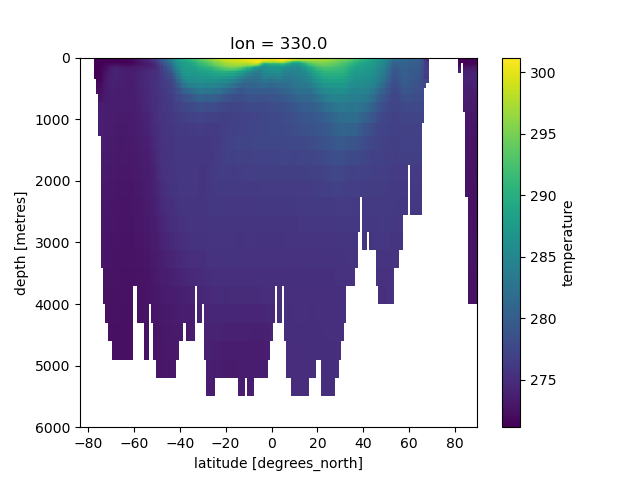

In [17]:
fig = plt.figure()
ax = plt.axes()

to_10YM.sel(lon=330, method='nearest').plot(ax=ax, ylim=[6000,0])

## Seasonal differences

In [9]:
to30w = to.sel(lon=330, method='nearest')
so30w = so.sel(lon=330, method='nearest')

<IPython.core.display.Javascript object>


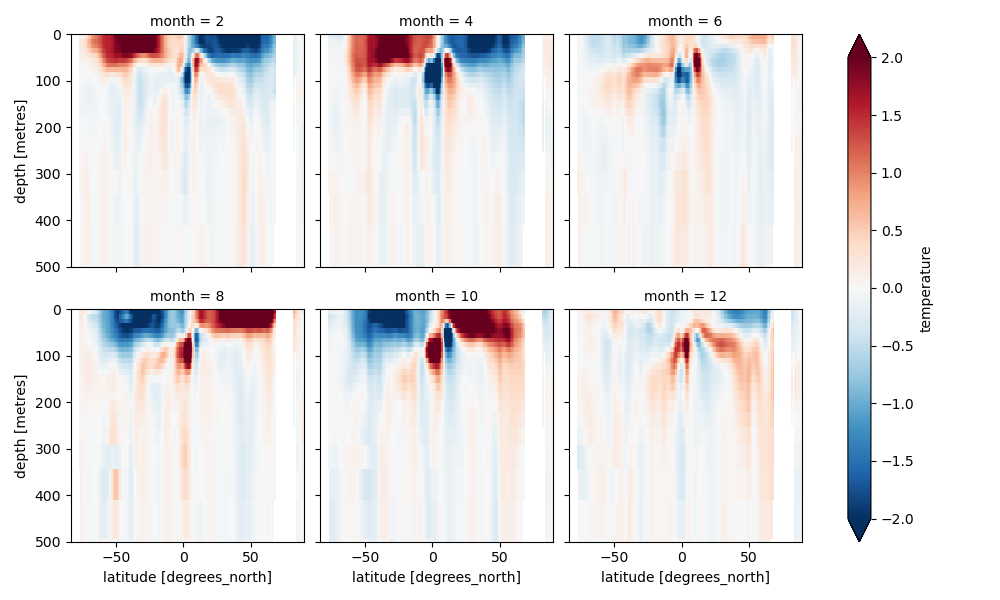

In [18]:
# fig = plt.figure()
clim = 2.

todiff = (to.sel(lon=330, method='nearest')-to_10YM.sel(lon=330, method='nearest')).isel(month=slice(1,None,2))
todiff.plot.pcolormesh("lat", "depth", col='month', col_wrap=3, ylim=[500,0], vmin=-clim, vmax=clim, cmap='RdBu_r')

<IPython.core.display.Javascript object>


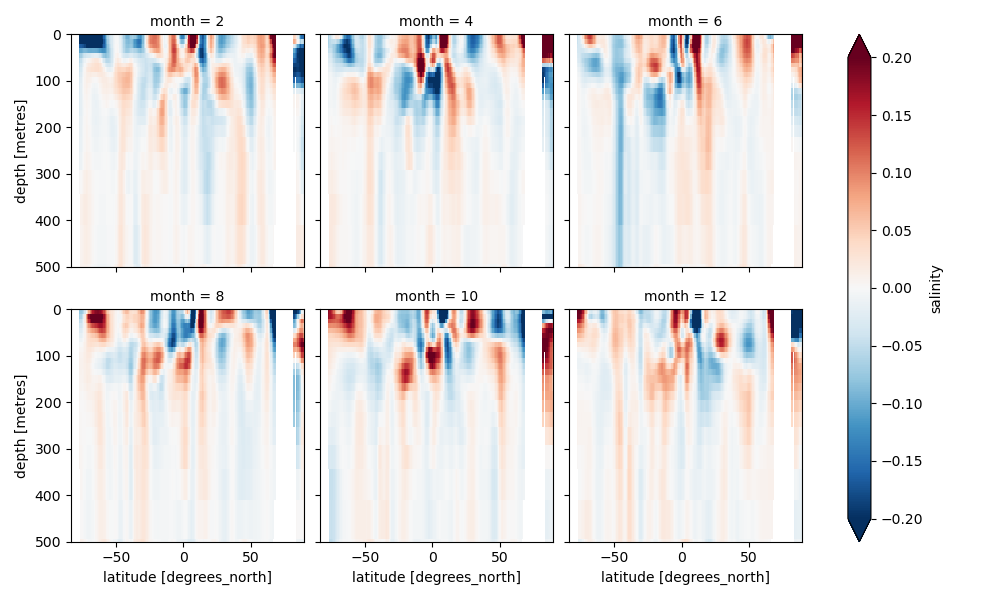

In [21]:
# fig = plt.figure()
clim = 0.2

sodiff = (so.sel(lon=330, method='nearest')-so_10YM.sel(lon=330, method='nearest')).isel(month=slice(1,None,2))
sodiff.plot.pcolormesh("lat", "depth", col='month', col_wrap=3, ylim=[500,0], vmin=-clim, vmax=clim, cmap='RdBu_r')

<IPython.core.display.Javascript object>


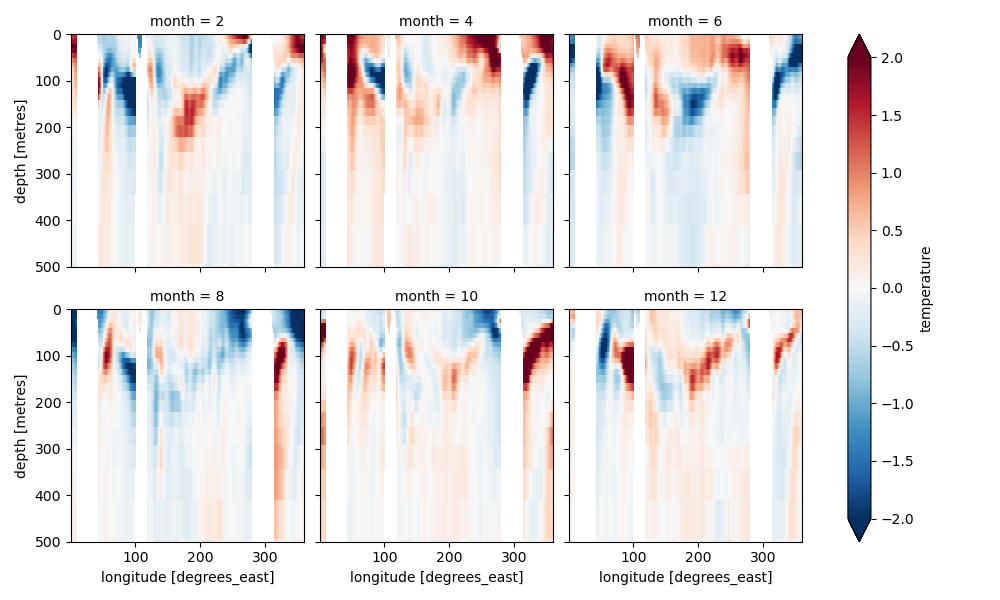

In [19]:
# fig = plt.figure()
clim = 2.

todiff = (to.sel(lat=0, method='nearest')-to_10YM.sel(lat=0, method='nearest')).isel(month=slice(1,None,2))
todiff.plot.pcolormesh("lon", "depth", col='month', col_wrap=3, ylim=[500,0], vmin=-clim, vmax=clim, cmap='RdBu_r')

<IPython.core.display.Javascript object>


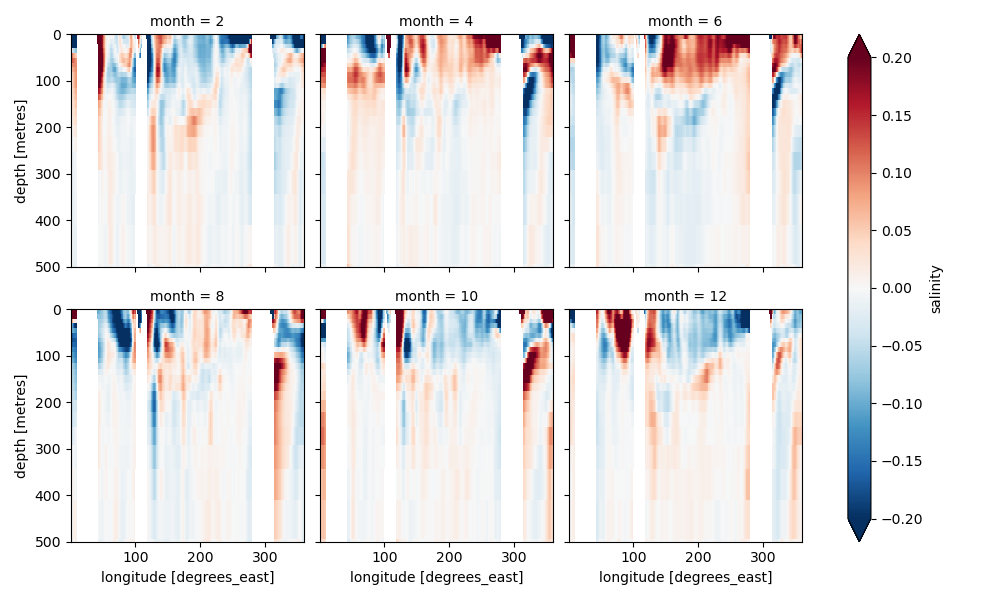

In [22]:
# fig = plt.figure()
clim = 0.2

sodiff = (so.sel(lat=0, method='nearest')-so_10YM.sel(lat=0, method='nearest')).isel(month=slice(1,None,2))
sodiff.plot.pcolormesh("lon", "depth", col='month', col_wrap=3, ylim=[500,0], vmin=-clim, vmax=clim, cmap='RdBu_r')

## Inter-annual varibility

In [31]:
ds.temperature.groupby('time.year').groups

{2010: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 2011: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 2012: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 2013: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
 2014: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 2015: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
 2016: [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
 2017: [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95],
 2018: [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107],
 2019: [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]}

In [32]:
%%time
to = ds.temperature.groupby('time.year').mean().compute()
so = ds.salinity.groupby('time.year').mean().compute()

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 15.3 s, sys: 14.1 s, total: 29.4 s
Wall time: 4.98 s


<IPython.core.display.Javascript object>


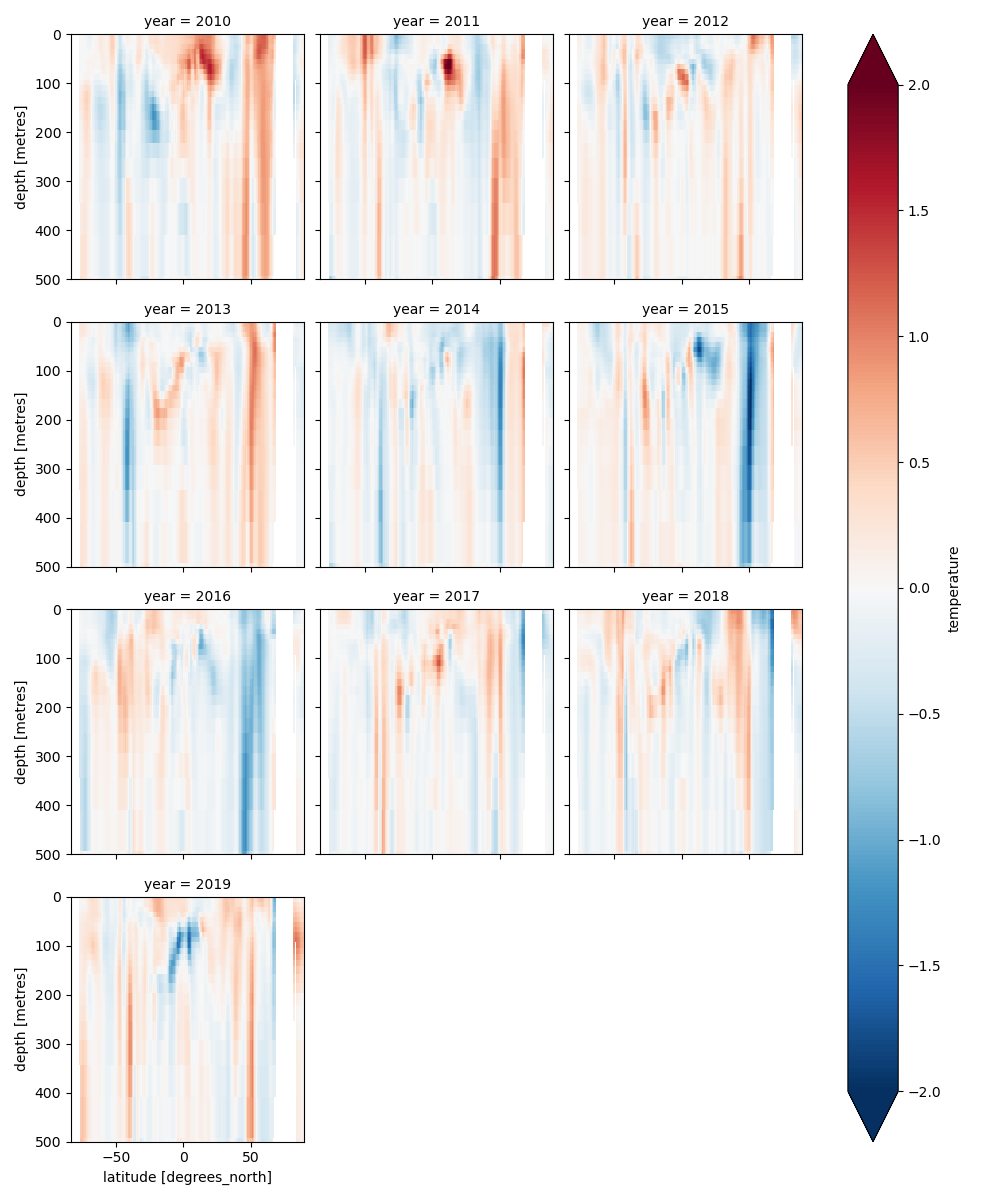

In [36]:
# fig = plt.figure()
clim = 2.

todiff = (to.sel(lon=330, method='nearest')-to_10YM.sel(lon=330, method='nearest')).isel(year=slice(None,None))
todiff.plot.pcolormesh("lat", "depth", col='year', col_wrap=3, ylim=[500,0], vmin=-clim, vmax=clim, cmap='RdBu_r')